In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## EDA

In [42]:
df = pd.read_csv('Walmart_Sales.csv')

In [43]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [44]:
df.shape

(6435, 8)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [46]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [47]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [48]:
df.duplicated().sum()

np.int64(0)

In [49]:
df['Holiday_Flag'].value_counts()

Holiday_Flag
0    5985
1     450
Name: count, dtype: int64

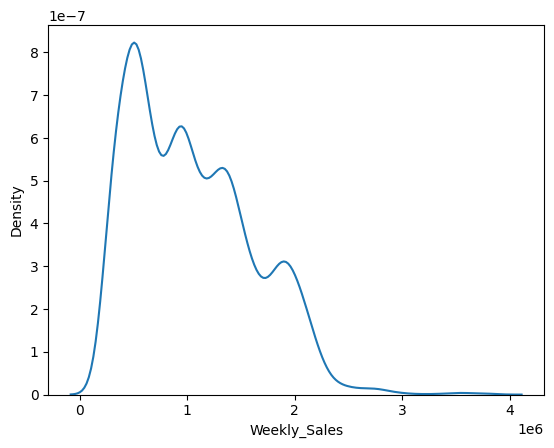

In [50]:
sns.kdeplot(df['Weekly_Sales'])
plt.show()

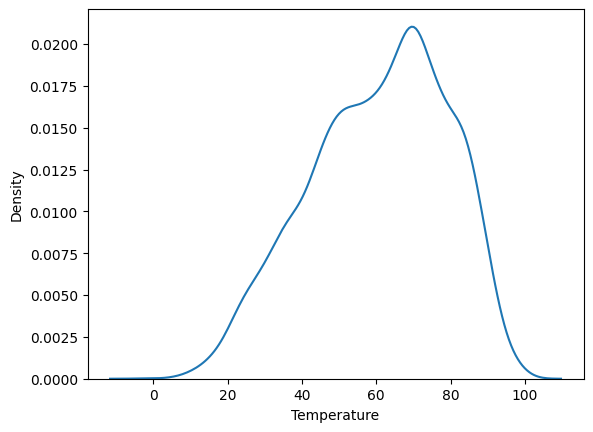

In [51]:
sns.kdeplot(df['Temperature'])
plt.show()

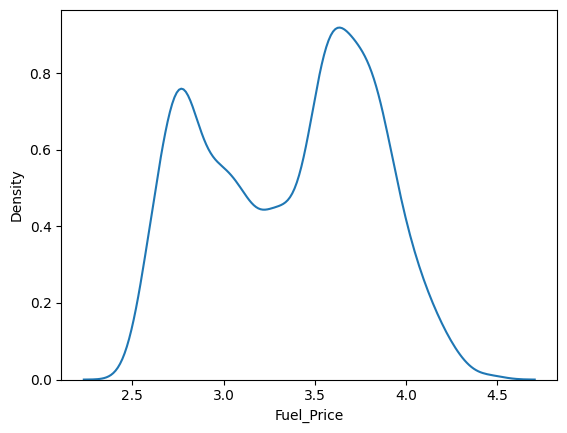

In [52]:
sns.kdeplot(df['Fuel_Price'])
plt.show()

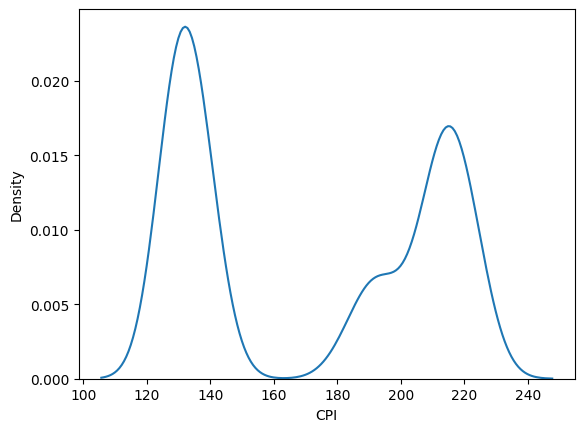

In [53]:
sns.kdeplot(df['CPI'])
plt.show()

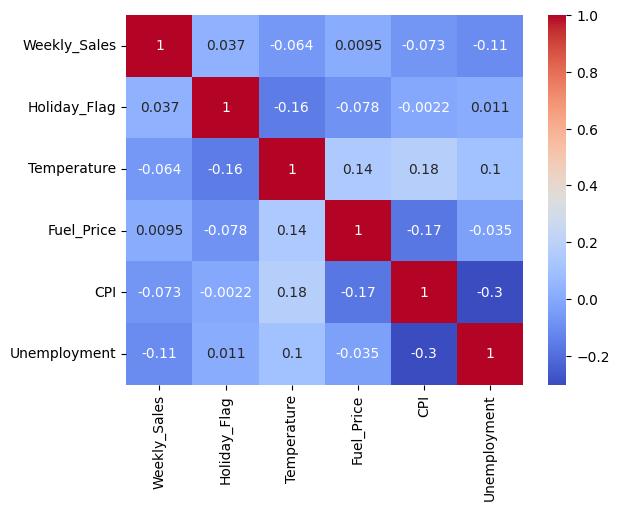

In [54]:
# Drop the 'Date' column
df_numeric = df.drop(['Date', 'Store'], axis=1)

# Calculate the correlation matrix
corr_matrix = df_numeric.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


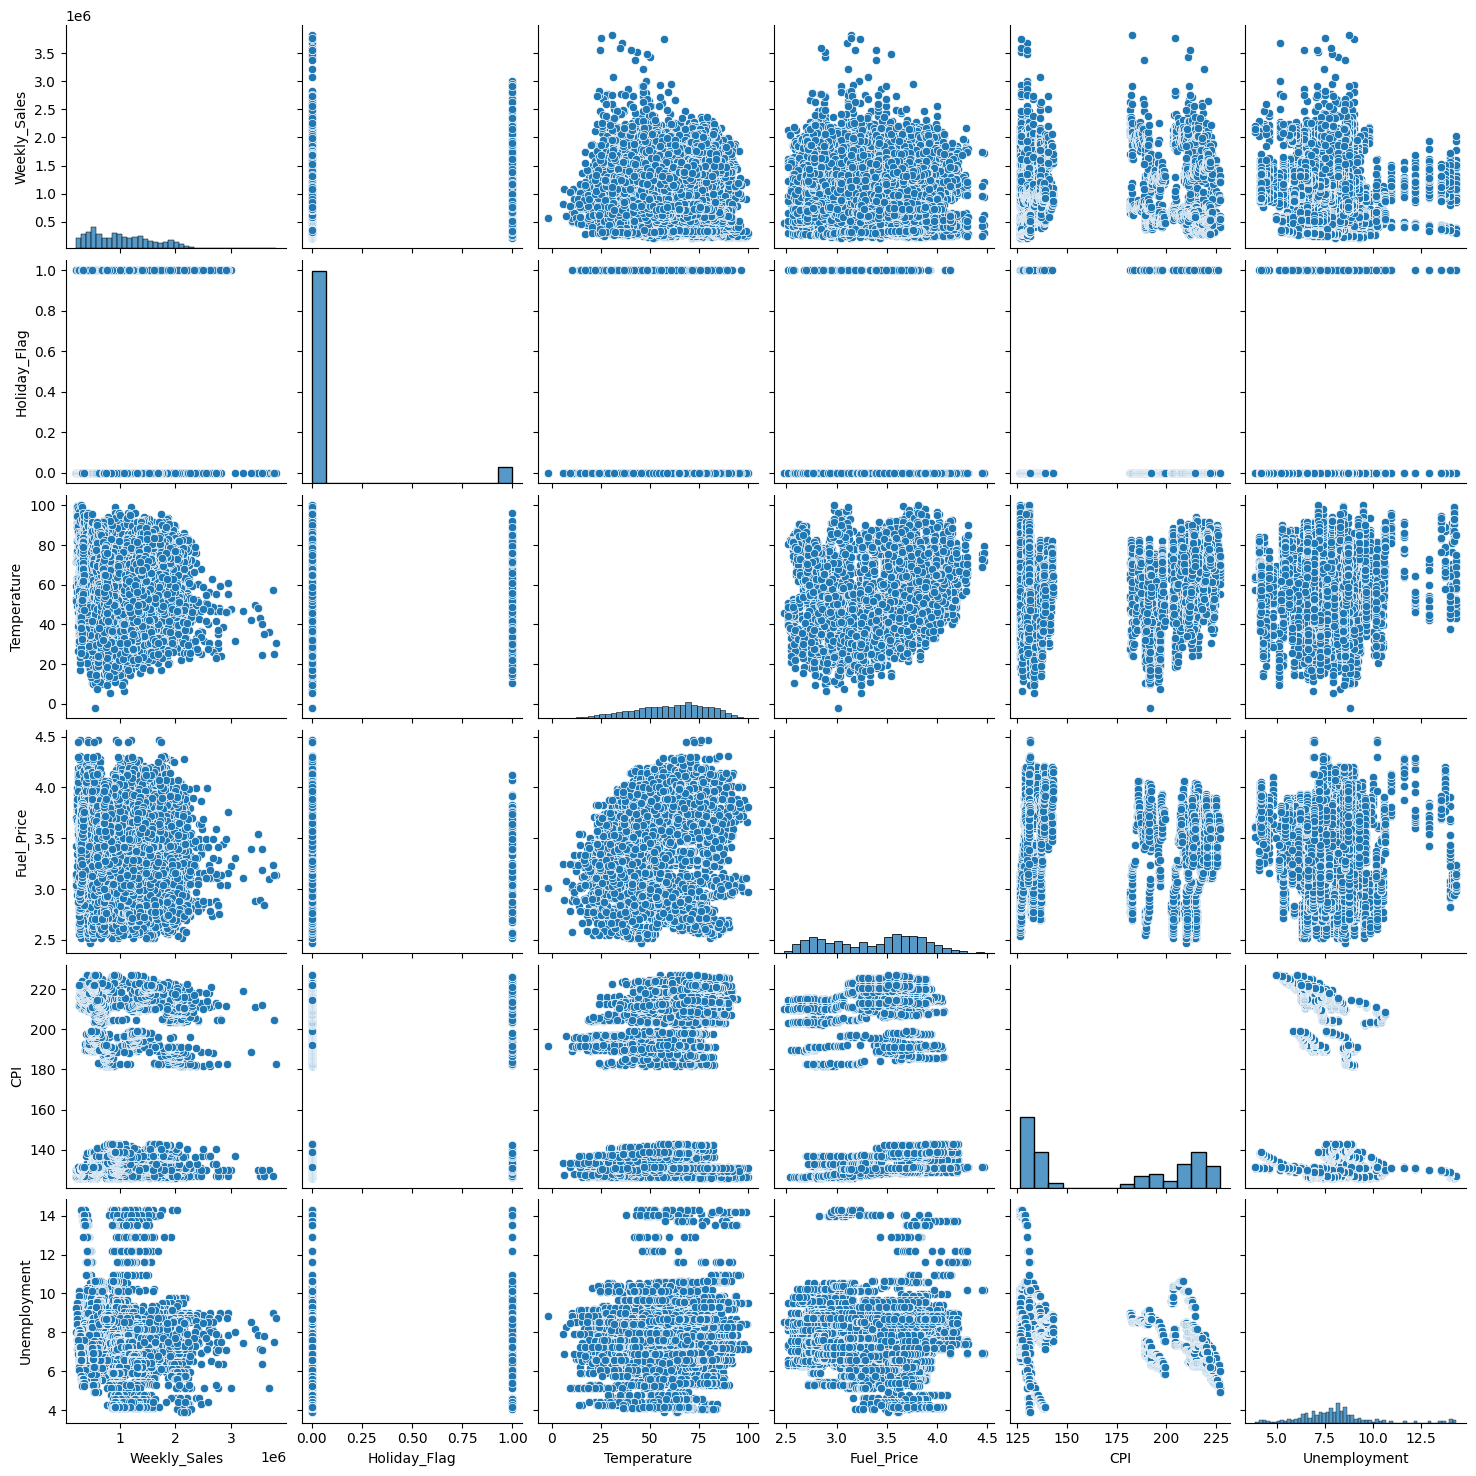

In [55]:
df_numeric = df.drop(['Date', 'Store'], axis=1)

sns.pairplot(df_numeric)
plt.show()

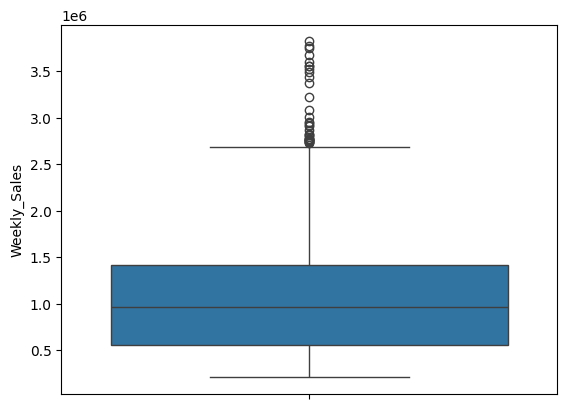

In [56]:
sns.boxplot(data=df['Weekly_Sales'])
plt.show()

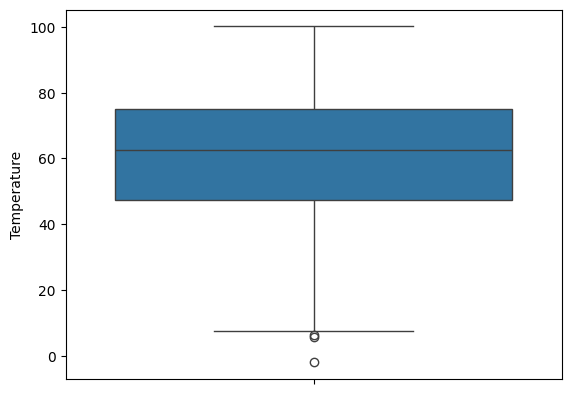

In [57]:
sns.boxplot(data=df['Temperature'])
plt.show()

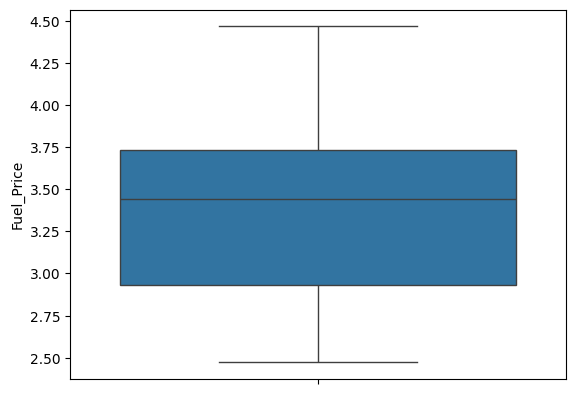

In [58]:
sns.boxplot(data=df['Fuel_Price'])
plt.show()

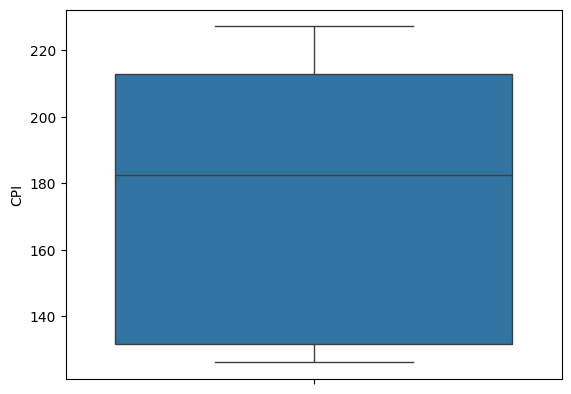

In [59]:
sns.boxplot(data=df['CPI'])
plt.show()

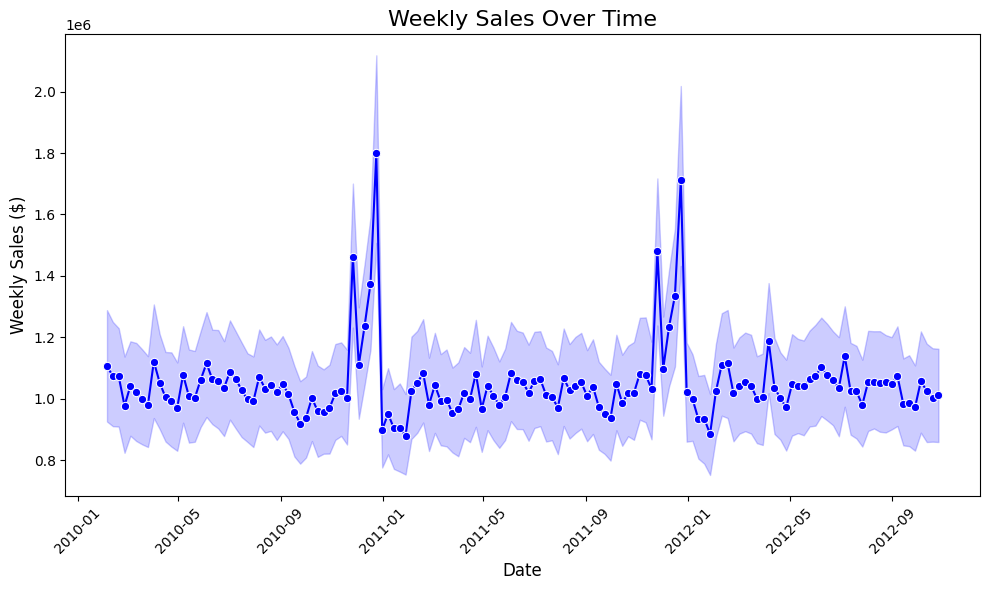

In [60]:
# Ensure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Set the plot size for better visibility
plt.figure(figsize=(10,6))

# Create the lineplot for Weekly_Sales vs Date
sns.lineplot(data=df, x='Date', y='Weekly_Sales', marker='o', color='b')

# Add labels and title
plt.title('Weekly Sales Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Weekly Sales ($)', fontsize=12)

# Rotate date labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

## Prepare for Model

In [61]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6401 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6401 non-null   int64         
 1   Date          6401 non-null   datetime64[ns]
 2   Weekly_Sales  6401 non-null   float64       
 3   Holiday_Flag  6401 non-null   int64         
 4   Temperature   6401 non-null   float64       
 5   Fuel_Price    6401 non-null   float64       
 6   CPI           6401 non-null   float64       
 7   Unemployment  6401 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 450.1 KB


In [62]:
# Removing outliers based on quantiles
q1 = df['Weekly_Sales'].quantile(0.25)
q3 = df['Weekly_Sales'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df = df[(df['Weekly_Sales'] >= lower_bound) & (df['Weekly_Sales'] <= upper_bound)]

In [65]:
df['Fuel_Price'] = np.log(df['Fuel_Price'])
df['CPI'] = np.log(df['CPI'])
df['Unemployment'] = np.log(df['Unemployment'])

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Drop the Date column (as it's not directly usable by the model, or use it as a feature after encoding)
df.drop('Date', axis=1, inplace=True)

# Define feature matrix X and target variable y
X = df.drop('Weekly_Sales', axis=1)  # Features (all columns except Weekly_Sales)
y = df['Weekly_Sales']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (StandardScaler normalizes data to have zero mean and unit variance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Initialize the model
lr_model = LinearRegression()

# Train the model on the training set
lr_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate the model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f'Linear Regression MAE: {mae_lr}, MSE: {mse_lr}')

Linear Regression MAE: 432698.9047349264, MSE: 268605984902.43457


In [68]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Random Forest MAE: {mae_rf}, MSE: {mse_rf}')

Random Forest MAE: 73746.33873263074, MSE: 17417735892.4369


In [69]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
print(f'Gradient Boosting MAE: {mae_gb}, MSE: {mse_gb}')

Gradient Boosting MAE: 127328.13756224106, MSE: 32646865951.299664


In [70]:
from sklearn.svm import SVR

# Initialize the model
svr_model = SVR(kernel='rbf')

# Train the model
svr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_svr = svr_model.predict(X_test_scaled)

# Evaluate the model
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
print(f'SVR MAE: {mae_svr}, MSE: {mse_svr}')

SVR MAE: 474898.9261559579, MSE: 328119756283.5075


In [71]:
# Print evaluation metrics for comparison
print(f'Linear Regression MAE: {mae_lr}, MSE: {mse_lr}')
print(f'Random Forest MAE: {mae_rf}, MSE: {mse_rf}')
print(f'Gradient Boosting MAE: {mae_gb}, MSE: {mse_gb}')
print(f'SVR MAE: {mae_svr}, MSE: {mse_svr}')

Linear Regression MAE: 432698.9047349264, MSE: 268605984902.43457
Random Forest MAE: 73746.33873263074, MSE: 17417735892.4369
Gradient Boosting MAE: 127328.13756224106, MSE: 32646865951.299664
SVR MAE: 474898.9261559579, MSE: 328119756283.5075


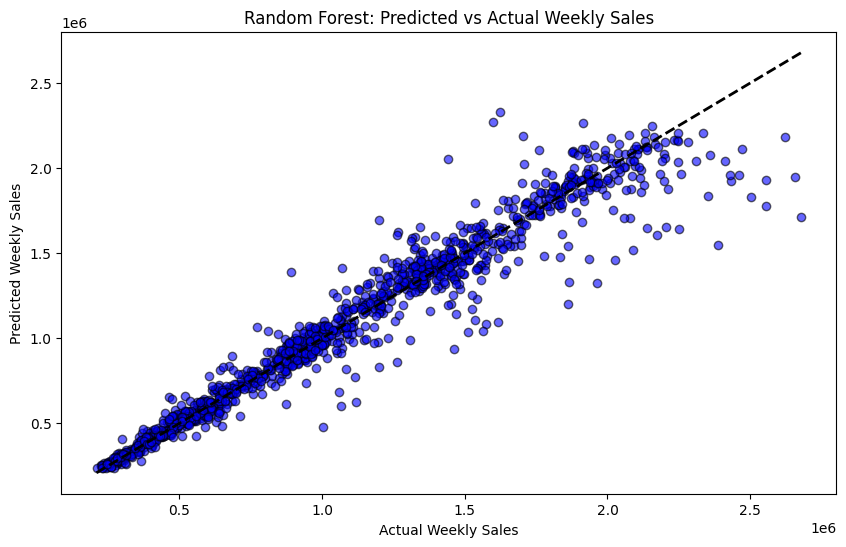

In [72]:
# Plotting Predicted vs. Actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='blue', edgecolors='k', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Line of perfect prediction
plt.xlabel('Actual Weekly Sales')
plt.ylabel('Predicted Weekly Sales')
plt.title('Random Forest: Predicted vs Actual Weekly Sales')
plt.show()

C:\Users\khale\AppData\Local\Temp\ipykernel_6460\2689672726.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




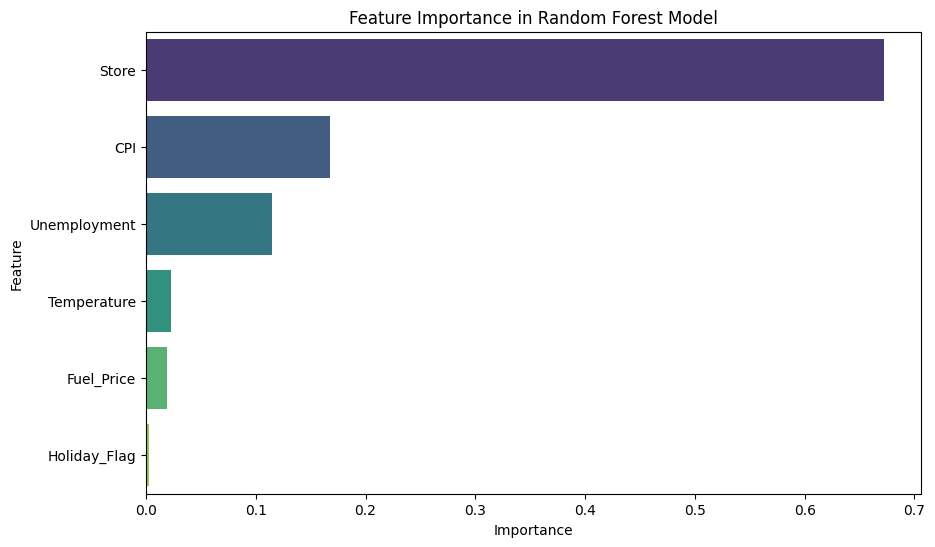

In [73]:
# Extract feature importance
importances = rf_model.feature_importances_
features = X.columns  # Feature names

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance in Random Forest Model')
plt.show()